<a href="https://colab.research.google.com/github/mngugi/Code_3_Camp/blob/main/CNN_Using_Sequencial_and_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the libraries

In [1]:
#data manipulation libraries
import numpy as np
import random

#data visualization library
import matplotlib.pyplot as plt

#model building libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, BatchNormalization, Reshape


###Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#importing training and testing data
#import numpy as np
#x_train = np.loadtxt('/content/input.csv', delimiter = ',')
#x_test = np.loadtxt('/content/input_test.csv', delimiter = ',')

#x_train = np.loadtxt('/content/input.csv', delimiter=',', usecols=range(30000))
#x_test = np.loadtxt('/content/input_test.csv', delimiter=',', usecols=range(30000))

import pandas as pd

# Read CSV file into a pandas DataFrame
x_train = pd.read_csv('/content/input.csv', delimiter=',')
x_test = pd.read_csv('/content/input_test.csv', delimiter=',')




In [ ]:
#importing training and test label
y_train = np.loadtxt('/content/labels.csv', delimiter = ',')
y_test = np.loadtxt('/content/labels_test.csv', delimiter = ',')


###Checking the shape of the dataset

In [ ]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

- There are 2000 images in the training set.
- Each samle is a flattened array of 30000 values.
- The test set has 400 images.

###Reshaping the dataset into an appropriate shape

In [ ]:
100 * 100 * 3

In [ ]:
#reshaping the train and test images
#x_train = x_train.reshape(len(x_train), 100,100, 3)
#x_test = x_test.reshape(len(x_test), 100,100, 3)
import numpy as np

# Assuming x_train and x_test are DataFrames
# Convert them to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Now you can reshape the arrays
x_train = x_train.reshape(len(x_train), 100, 100, 3)
x_test = x_test.reshape(len(x_test), 100, 100, 3)


In [ ]:
#reshaping the labels
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

**Checking the shape of the dataset again**

In [ ]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

- The shape has been fixed

###Rescaling the dataset

In [ ]:
#checking the scale
x_train[1]

- The images are ranging from 1 to 255, they should range from 0 to 1

In [ ]:
#rescaling the dataset
#x_train = x_train/255.0
#x_test = x_test/255.0
import numpy as np

# Convert x_train and x_test to NumPy arrays if they are not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Check data types
print("Data type of x_train:", x_train.dtype)
print("Data type of x_test:", x_test.dtype)

# Check for non-numeric values
non_numeric_x_train = x_train[np.logical_not(np.issubdtype(x_train.dtype, np.number))]
non_numeric_x_test = x_test[np.logical_not(np.issubdtype(x_test.dtype, np.number))]

if non_numeric_x_train.size > 0 or non_numeric_x_test.size > 0:
    print("Non-numeric values found in x_train:", non_numeric_x_train)
    print("Non-numeric values found in x_test:", non_numeric_x_test)
    # Handle or remove non-numeric values as needed
else:
    # Data appears to be numeric, proceed with rescaling
    x_train = x_train / 255.0
    x_test = x_test / 255.0


In [ ]:
#checking the scale
x_train[1]

- The scale of the images has changed

###Displaying one image

In [ ]:
#dispalying any random image
#randomimage = random.randint(0, len(x_train))
#plotting the image
#plt.imshow(x_train[randomimage, :])
#plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Convert x_train to NumPy array if it's not already
x_train = np.array(x_train)

# Check the data type and shape
print("Data type of x_train:", x_train.dtype)
print("Shape of x_train:", x_train.shape)

# Ensure the images are represented as numerical arrays
# Assuming each image is represented as a 2D array (grayscale) or 3D array (RGB)
# If the images are not in the correct shape or dtype, you may need to preprocess them accordingly

# Plot a random image
random_image_index = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_image_index])
plt.show()



- As shown, a cat is displayed

##MODEL BUILDING

###Sequencial model/Sequential API
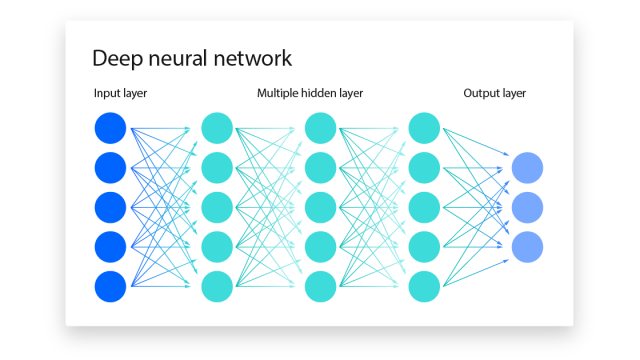

In [ ]:
sq_model = Sequential([
    Conv2D(32, 3,3, activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, 3,3, activation = 'relu'),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

sq_model.summary()

In [ ]:
from tensorflow.keras import layers

In [ ]:
sq1 = Sequential()
sq1.add(layers.Conv2D(32, 3,3, activation = 'relu', input_shape = (100,100,3))),
sq1.add(layers.MaxPooling2D((2,2))),
sq1.add(layers.Conv2D(32, 3,3, activation = 'relu')),
sq1.add(layers.Flatten()),
sq1.add(layers.Dense(1, activation = 'sigmoid'))

**Compiling the model**

In [ ]:
#compiling the model
sq_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#fitting the model
sq_model.fit(x_train, y_train, epochs = 50, batch_size = 32)

In [ ]:
sq_model.evaluate(x_test,y_test)

In [ ]:
keras.utils.plot_model(sq_model, 'model.png', show_shapes = True)

###Functional API model

In [ ]:
#creating the functional API model

input_layer = Input(shape=(100, 100, 3))
conv_layer1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pooling_layer1 = MaxPooling2D((2, 2))(conv_layer1)
conv_layer2 = Conv2D(32, (3, 3), activation='relu')(pooling_layer1)
pooling_layer2 = MaxPooling2D((2, 2))(conv_layer2)
flatten_layer = Flatten()(pooling_layer2)
dense_layer1 = Dense(64, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer1)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'] )



In [ ]:
#fitting the model
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

In [ ]:
#testing the model on test set
model.evaluate(x_test,y_test)

In [ ]:
keras.utils.plot_model(model, 'model.png',show_shapes = True)